In [30]:
import os
import sys

# Определяем путь к текущей папке
current_dir = os.getcwd()

# Определяем путь к корневой папке проекта, поднимаясь из текущей папке на один уровень
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)
SRC_DIR = parent_dir + '\SRC'


# Импортируем общие модули
from __init__ import *
from DC_settings import *


# Импортируем отдельные функции из общего модуля DC_settings
from DC_settings import db_connect as dbcon

In [31]:
# Коннектимся к SQLlite 
db_name = 'data.db'
table_name = 'User_rep'
try:
    cursor, cnx = dbcon(SRC_DIR, db_name)
    columns = ['Status', 'Urgency', 'Ratings']
    cols = []
    for i in columns:
        cursor.execute(f"SELECT {i} FROM {table_name}")
        cols.append(cursor.fetchall())
    df = pd.DataFrame(zip(cols[0], cols[1], cols[2]), columns=columns)
    print(df.head())
except sqlite3.Error as e:
    print('Update the data base')

    Status Urgency Ratings
0   online     выс     4.5
1   online    сред     4.2
2  offline    низк     4.8
3   online    сред     3.9
4   online    сред     4.6


In [64]:
def make_chart(labels, sizes, type, title):
    fig, ax = plt.subplots()
    
    if type == 'pie':
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=240)
    if type == 'donut':
        wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=240, pctdistance=0.85)
        centre_circle = plt.Circle((0, 0), 0.70, fc='white')
        ax.add_artist(centre_circle)
    if type == 'bar':
        x = np.arange(len(labels))
        width = 0.8  # Adjust the width as needed for spacing
        ax.bar(x, sizes, width=width)
        ax.set_xticks(x)
        ax.set_xticklabels(labels)

    # Apply common settings
    ax.set_title(title)
    plt.tight_layout()
    plt.show()
    

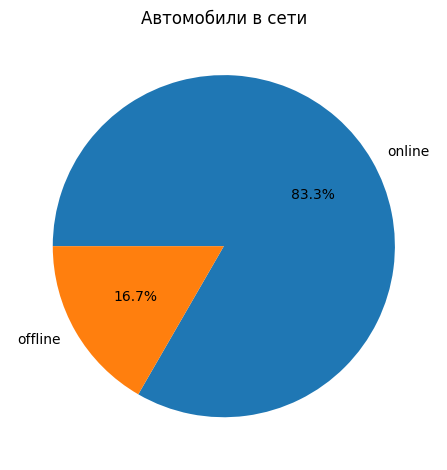

None


In [67]:
# Построение графика 'Status'
on_count = (df['Status'] == 'online').sum()
off_count = (df['Status'] == 'offline').sum()
pprint(make_chart(['online', 'offline'], [on_count, off_count], 'pie', 'Автомобили в сети'))

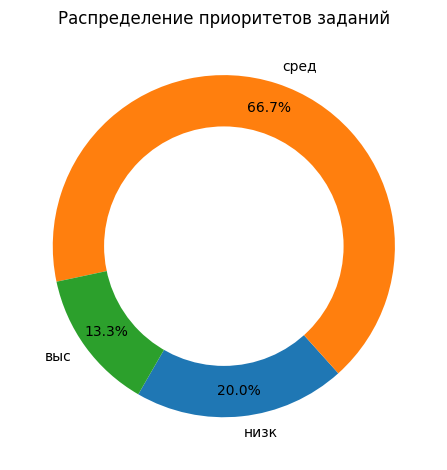

None


In [66]:
# Построение графика 'Urgency'
lower = (df['Urgency'] == 'низк').sum()
mid = (df['Urgency'] == 'сред').sum()
hi = (df['Urgency'] == 'выс').sum()
pprint(make_chart(['низк', 'сред', 'выс'], [lower, mid, hi], 'donut', 'Распределение приоритетов заданий'))

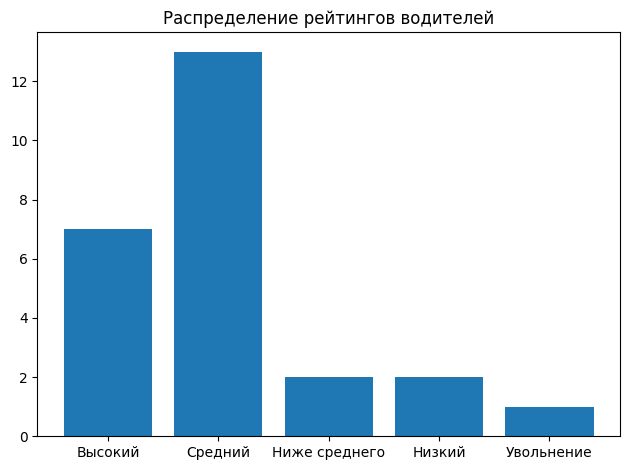

None


In [65]:
# Построение графика 'Ratings'
hi = ((df['Ratings'].astype(float) < 5.0) & (df['Ratings'].astype(float) > 4.7)).sum()
mid = ((df['Ratings'].astype(float) < 4.7) & (df['Ratings'].astype(float) > 4.2)).sum()
under_mid = ((df['Ratings'].astype(float) < 4.2) & (df['Ratings'].astype(float) > 3.7)).sum()
low = ((df['Ratings'].astype(float) < 3.7) & (df['Ratings'].astype(float) > 3.3)).sum()
trash = ((df['Ratings'].astype(float) < 3.3) & (df['Ratings'].astype(float) > 0)).sum()

pprint(make_chart(['Высокий', 'Средний', 'Ниже среднего', 'Низкий', 'Увольнение'], [hi, mid, under_mid, low, trash], 'bar', 'Распределение рейтингов водителей'))
